# Predicting Housing Prices

In this project, I've used Supervised Learning regressors to predict House Prices.

 Import necessary Python libraries

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

C:\Users\eg62453\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load the Boston housing dataset

In [2]:
from sklearn import datasets

dataset = datasets.load_boston()
print(dataset.DESCR)

X = pd.DataFrame(dataset.data).rename(index=str, 
      columns={0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 
               7:'DIS', 8:'RAD', 9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT'})
y = dataset.target


print("Boston housing dataset has {} data points with {} features each.".format(*X.shape))
print("\nFeatures:")
display(X.head())
print("\nTargets:")
display(y[:5])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



Targets:


array([ 24. ,  21.6,  34.7,  33.4,  36.2])

## Data Exploration
Let's explore some statistics about the dataset to get a feel for it

In [3]:
print("Statistics for Boston housing dataset:\n")
print("Minimum price in 1000s: ${:,.2f}".format(y.min()))
print("Maximum price in 1000s: ${:,.2f}".format(y.max()))
print("Mean price in 1000s: ${:,.2f}".format(y.mean()))
print("Standard deviation of prices in 1000s: ${:,.2f}".format(y.std()))

Statistics for Boston housing dataset:

Minimum price in 1000s: $5.00
Maximum price in 1000s: $50.00
Mean price in 1000s: $22.53
Standard deviation of prices in 1000s: $9.19


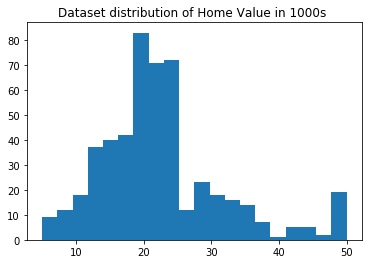

In [4]:
plt.hist(y, bins=20)
plt.title('Dataset distribution of Home Value in 1000''s ')
plt.show()

#### Non Preprocessed Features

In [5]:
columns={0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 
               7:'DIS', 8:'RAD', 9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT'}

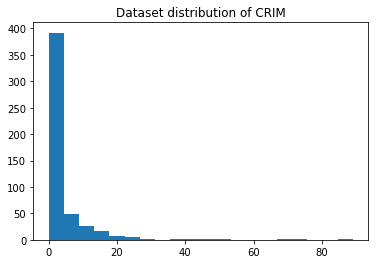

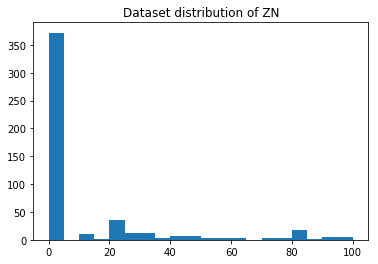

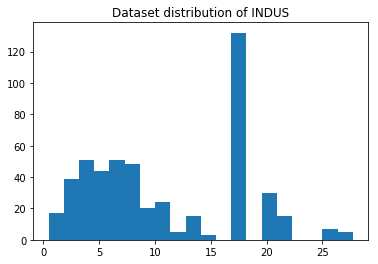

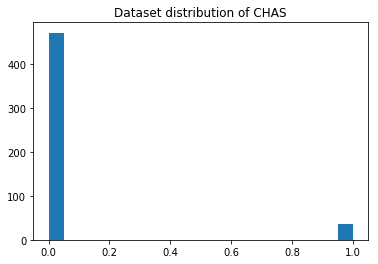

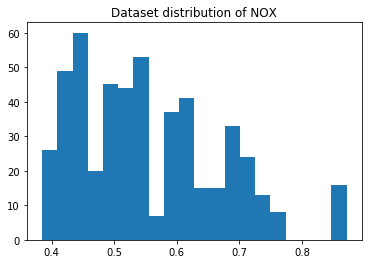

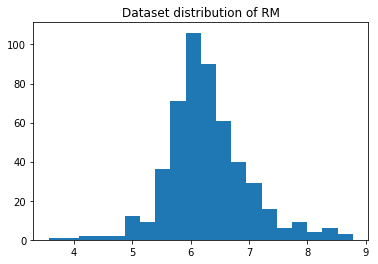

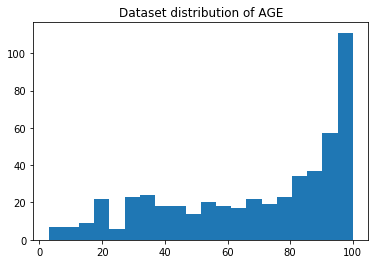

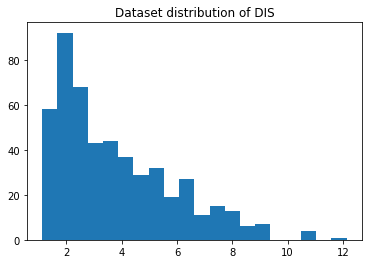

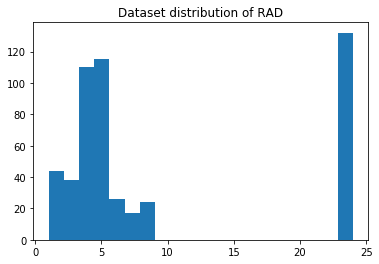

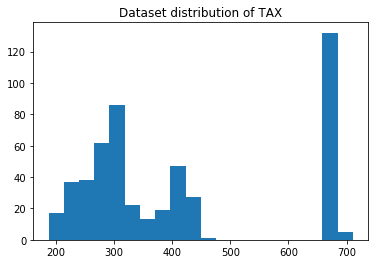

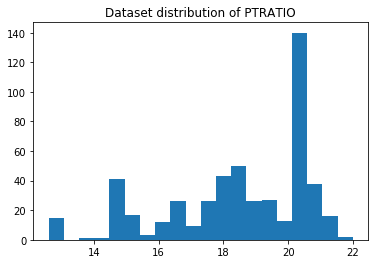

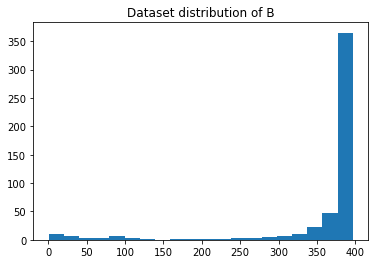

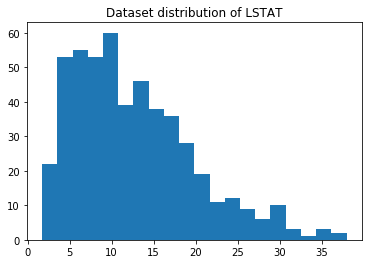

In [6]:
for key,value in columns.items():
    plt.hist(X[value], bins=20)
    plt.title('Dataset distribution of ' + value)
    plt.show()

#### Preprocessed features

In [7]:
from sklearn import preprocessing

# scale features
X_scaled = pd.DataFrame(preprocessing.robust_scale(X)).rename(index=str, 
      columns={0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 
               7:'DIS', 8:'RAD', 9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT'})

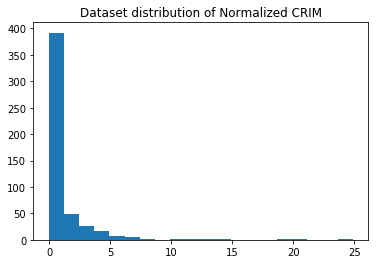

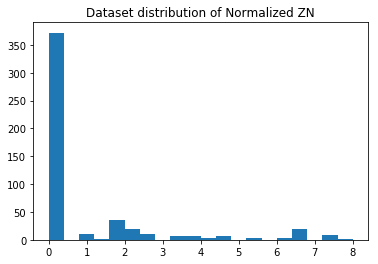

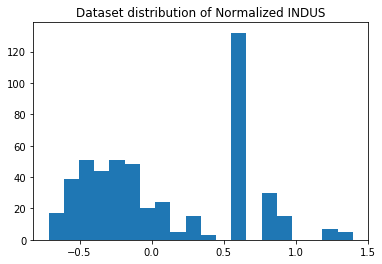

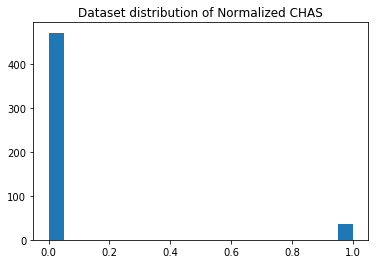

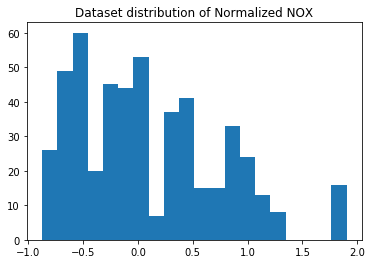

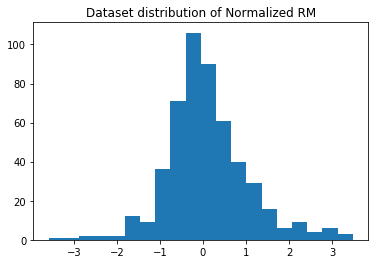

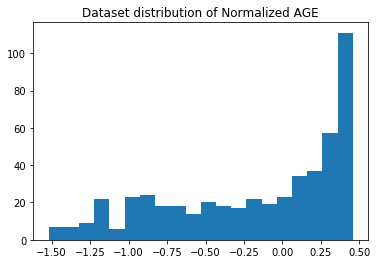

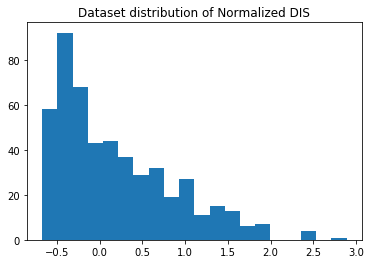

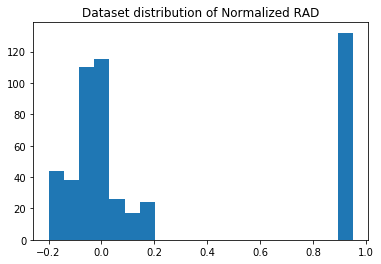

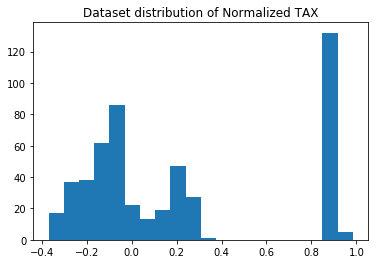

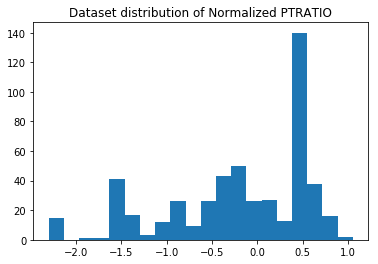

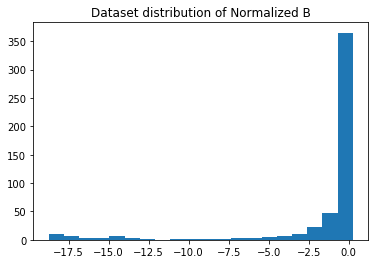

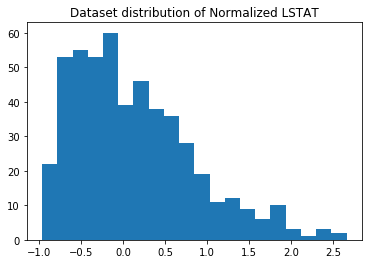

In [8]:
for key,value in columns.items():
    plt.hist(X_scaled[value], bins=20)
    plt.title('Dataset distribution of Normalized ' + value)
    plt.show()

### Shuffle and Split Data
We split the data into training and testing subsets. We also shuffle the data into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [9]:
from sklearn.model_selection import train_test_split 

def reset_train_test_data():
    # Shuffle and split the data into training and testing subsets
    return train_test_split(X_scaled, y, test_size=0.25, random_state=1)

X_train, X_test, y_train, y_test = reset_train_test_data()

# Success
print('Number of rows in the total set: {}'.format(y.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 506
Number of rows in the training set: 379
Number of rows in the test set: 127


### Developing a Generalized Linear Model

Fit linear model with only 3 features
- CRIM: per capita crime rate by town
- RM: average number of rooms per dwelling
- PTRATIO: pupil-teacher ratio by town

In [10]:
from sklearn import linear_model

X_train, X_test, y_train, y_test = reset_train_test_data()

# start with only 3 features
features_small = ['CRIM','RM','PTRATIO']

regr_LinearRegression = linear_model.LinearRegression()
regr_LinearRegression.fit(X_train[features_small],y_train)
y_pred = regr_LinearRegression.predict(X_test[features_small])

coef = pd.DataFrame(regr_LinearRegression.coef_).transpose().rename(index=str, 
      columns={0:'CRIM', 1:'RM', 2:'PTRATIO'})

print('Coefficients: ')
display(coef) 
print('\nIntercept: \n', regr_LinearRegression.intercept_ )

Coefficients: 


,CRIM,RM,PTRATIO
0,-0.696554,4.982093,-3.030767



Intercept: 
 22.094882087


See prediction for first test example

In [11]:
# Normalized features
print('Normalized features: ')
display(X_test.iloc[100][features_small])

# Target
print('Target: ',y_test[100])

# Prediction
print('Prediction: ',y_pred[100])

Normalized features: 


CRIM       3.363091
RM        -0.503388
PTRATIO    0.410714
Name: 426, dtype: float64

Target:  10.2
Prediction:  15.9996047926


#### Measure the performance of the model

The [*coefficient of determination*](https://en.wikipedia.org/wiki/Coefficient_of_determination), R<sup>2</sup>, quantifies a model's performance. The values for R<sup>2</sup> range from 0 to 1, and it captures the proportion of the variance in the target (house value) that is predictable from the features. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**.

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 31.09
R2 score: 0.69


#### Visualize how each feature of the model using only 3 features influences the house value

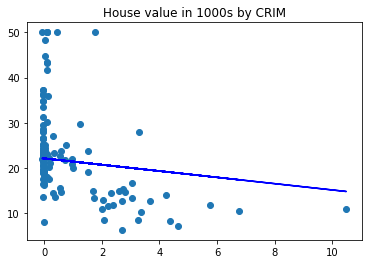

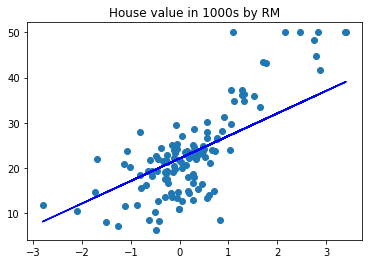

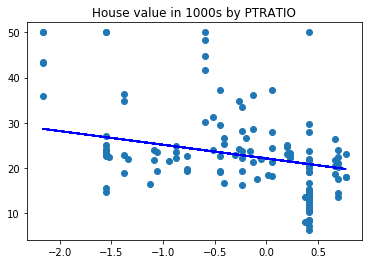

In [13]:
for idx, column_name in enumerate(features_small):
    plt.scatter(X_test[column_name],y_test)
    plt.plot(X_test[column_name], 
             regr_LinearRegression.intercept_ + X_test[column_name]*regr_LinearRegression.coef_[idx], color='blue')
    plt.title('House value in 1000s by ' + column_name)
    plt.show()

#### Fit linear model with all 13 features

In [14]:
X_train, X_test, y_train, y_test = reset_train_test_data()

regr_LinearRegression.fit(X_train, y_train)
y_pred = regr_LinearRegression.predict(X_test)

coef = pd.DataFrame(regr_LinearRegression.coef_).transpose().rename(index=str, 
      columns={0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 
               7:'DIS', 8:'RAD', 9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT'})

print('Coefficients: \n')
display(coef) 
print('\nIntercept: \n', regr_LinearRegression.intercept_ )
print("\nMean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.403804,0.713587,0.500419,2.432798,-3.72236,2.117544,0.344383,-4.543381,6.103747,-4.127351,-2.792732,0.133389,-5.587047



Intercept: 
 22.9455997465

Mean squared error: 21.89
R2 score: 0.78


Using all the 13 features, the R2 score improved from 0.69 to 0.78, compared to when using only 3 features

See prediction for first example

In [15]:
# Normalized features
print('Normalized features: ')
display(X_test.iloc[100])

# Target
print('Target: ',y_test[100])

# Prediction
print('Prediction: ',y_pred[100])

Normalized features: 


CRIM        3.363091
ZN          0.000000
INDUS       0.651433
CHAS        0.000000
NOX         0.262857
RM         -0.503388
AGE        -0.362895
DIS        -0.391759
RAD         0.950000
TAX         0.868217
PTRATIO     0.410714
B         -17.593956
LSTAT       0.432784
Name: 426, dtype: float64

Target:  10.2
Prediction:  17.8273823701


Although the model using all 13 features performs better overall, it's worse at predicting some targets. Indeed, it predicts 17.83 in the example above, when the simpler model predicted 15.99 (the real value is 10.2)

#### Visualize how each feature of the model using all the features influences the house value

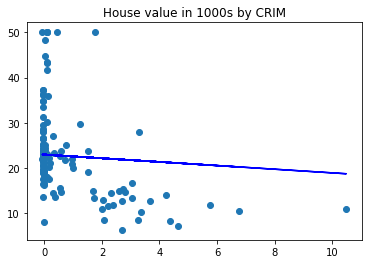

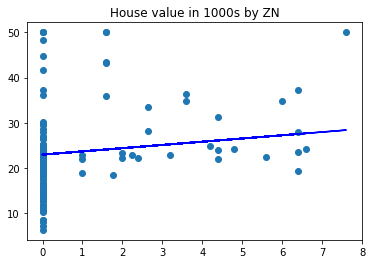

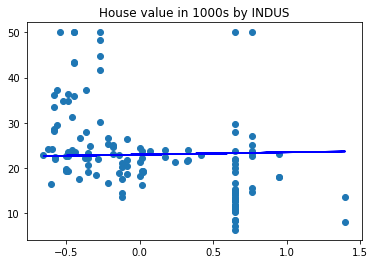

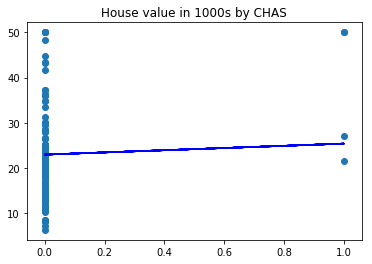

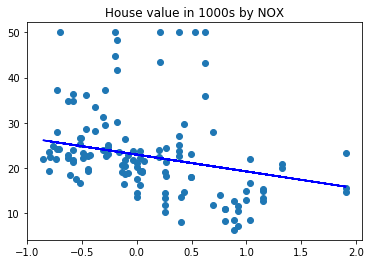

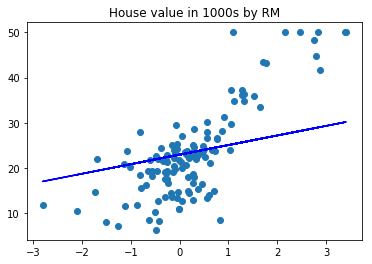

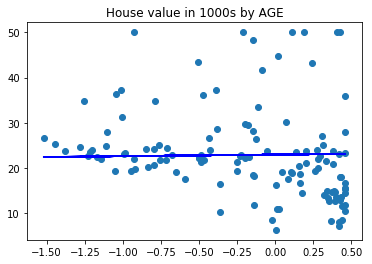

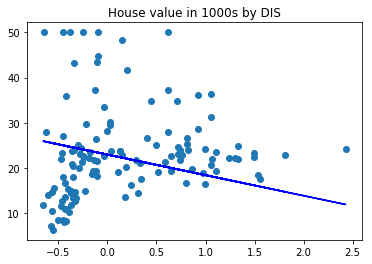

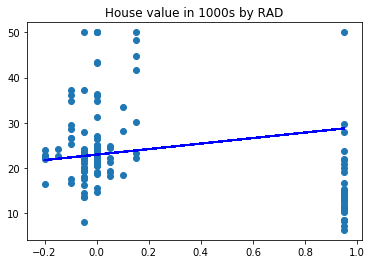

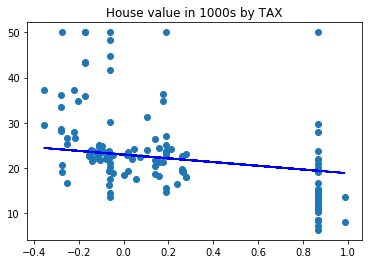

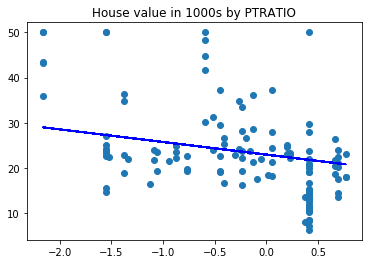

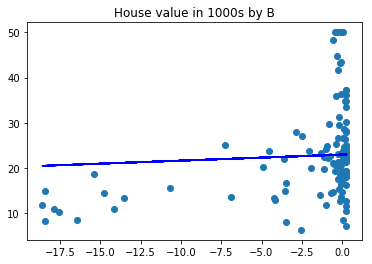

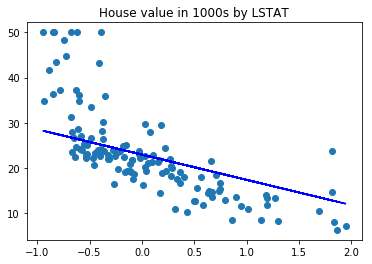

In [16]:
columns={0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 
               7:'DIS', 8:'RAD', 9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT'}

for key, value in columns.items(): 
    plt.scatter(X_test[value],y_test)
    plt.plot(X_test[value], 
             regr_LinearRegression.intercept_ + X_test[value]*regr_LinearRegression.coef_[key], color='blue')
    plt.title('House value in 1000s by ' + value)
    plt.show()

It looks like some features aren't really good at predicting the target

#### Fit linear model with the 'n' best features

When all features are normlaized on the same scale, the most important features should have the highest coefficients in the model, while features uncorrelated with the target variables should have coefficient values close to zero

In [17]:
# use sklearn.feature_selection to choose the best features
from sklearn.feature_selection import SelectFromModel

def fit_with_n_best_features(regressor):

    # Reset X
    X = pd.DataFrame(dataset.data)
    
    # initialize results dictionary
    best_n_features_results = {}

    # calculate R2 score of each model using the best 'n' features
    for i in range(X.shape[1]):

        # Reset features
        X_train, X_test, y_train, y_test = reset_train_test_data()

        # Set a minimum threshold of 0.1
        sfm = SelectFromModel(regressor, threshold=0.1)
        sfm.fit(X_train, y_train)
        n_features = sfm.transform(X_train).shape[1]

        # Increase the threshold until the number of features desired is reached.
        n_best_features = i+1
        while n_features > n_best_features:
            sfm.threshold += 0.1
            X_transform = sfm.transform(X_train)
            n_features = X_transform.shape[1]

        # only keep the best features
        X_train = X_train.iloc[:,sfm.get_support()]
        X_test = X_test.iloc[:,sfm.get_support()]

        # make predictions
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        # calculate R2 score and MSE
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # save results in dictionary
        scores={'mse':mse,'r2':r2}
        best_n_features_results[i+1]=scores

    return best_n_features_results

In [18]:
fit_with_n_best_features(regr_LinearRegression)

{1: {'mse': 84.62573006556093, 'r2': 0.14569923170771493},
 2: {'mse': 46.294450841782698, 'r2': 0.53265531781923969},
 3: {'mse': 42.303738155602616, 'r2': 0.57294175211287823},
 4: {'mse': 38.413899240878784, 'r2': 0.61220986088792029},
 5: {'mse': 38.565027757942481, 'r2': 0.61068421132320327},
 6: {'mse': 32.559444421516048, 'r2': 0.67131086062215406},
 7: {'mse': 32.225044316939595, 'r2': 0.67468664557591895},
 8: {'mse': 23.360506852606907, 'r2': 0.76417457271661537},
 9: {'mse': 23.121157977508798, 'r2': 0.76659081098986626},
 10: {'mse': 23.191364133307566, 'r2': 0.76588207650933338},
 11: {'mse': 23.068094214584878, 'r2': 0.76712649219934326},
 12: {'mse': 23.106010633164775, 'r2': 0.76674372415115499},
 13: {'mse': 21.889369432474979, 'r2': 0.77902577491373182}}

It looks like the more features we use to train the model, the better is the performance of the model. Let's engineer additional features by combining the 13 original features to see if we can have a better performance.

#### Fit linear model with the 'n' best polynomial features of degree d

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [39]:
def fit_n_best_polynomial_features(regressor, degree):

    # Reset X
    X = pd.DataFrame(dataset.data)

    # initialize results dictionary
    best_n_poly_features_results = {}

    # create polynomial features
    poly = preprocessing.PolynomialFeatures(degree=degree, interaction_only=False, include_bias=False)

    # how many poly features are created?
    X = poly.fit_transform(X.iloc[0])
    n_poly_features = X.shape[1]

    # calculate R2 score of each model using the best 'n' poly features
    for i in range(n_poly_features):

        # Reset training and test data
        X_train, X_test, y_train, y_test = reset_train_test_data()

        # Reset polynomial features
        X_train = poly.fit_transform(X_train)
        X_test = poly.fit_transform(X_test)

        # Set a minimum threshold of 0.1
        sfm = SelectFromModel(regressor, threshold=0.1)
        sfm.fit(X_train, y_train)
        n_features = sfm.transform(X_train).shape[1]

        # Increase the threshold until the number of features desired is reached.
        n_best_features = i+1
        while n_features > n_best_features:
            sfm.threshold += 0.1
            X_transform = sfm.transform(X_train)
            n_features = X_transform.shape[1]

        # only keep the best features 
        X_train = X_train[:,sfm.get_support()]
        X_test = X_test[:,sfm.get_support()]

        # make predictions
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        # calculate R2 score and MSE
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # save results in dictionary
        scores={'mse':mse,'r2':r2}
        best_n_poly_features_results[i+1]=scores
 
    return best_n_poly_features_results

In [40]:
best_n_poly_features_degree2_results = fit_n_best_polynomial_features(regr_LinearRegression, degree=2)
best_n_poly_features_degree2_results

C:\Users\eg62453\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\eg62453\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


{1: {'mse': 82.072204690783408, 'r2': 0.17147719176591758},
 2: {'mse': 81.687160990543561, 'r2': 0.17536422622560466},
 3: {'mse': 76.933343839378338, 'r2': 0.22335423637281671},
 4: {'mse': 79.934958405195516, 'r2': 0.19305279462799108},
 5: {'mse': 79.14763039520389, 'r2': 0.20100090832004192},
 6: {'mse': 82.338910223535606, 'r2': 0.16878478673305719},
 7: {'mse': 80.462283691126657, 'r2': 0.18772942079639254},
 8: {'mse': 81.917877145540487, 'r2': 0.17303513567219242},
 9: {'mse': 81.771882127040726, 'r2': 0.17450896232484958},
 10: {'mse': 81.638401929191801, 'r2': 0.17585645126805638},
 11: {'mse': 83.027464516917036, 'r2': 0.16183379840609102},
 12: {'mse': 81.862241359520254, 'r2': 0.17359678157710579},
 13: {'mse': 77.680434536857064, 'r2': 0.21581232026354769},
 14: {'mse': 73.991687413414212, 'r2': 0.25305039784529293},
 15: {'mse': 76.279280437215107, 'r2': 0.22995703751316754},
 16: {'mse': 75.112473920730849, 'r2': 0.24173600476944657},
 17: {'mse': 75.112473920730849, '

In [44]:
best_n_poly_features_degree3_results = fit_n_best_polynomial_features(regr_LinearRegression, degree=3)
best_n_poly_features_degree3_results

C:\Users\eg62453\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\eg62453\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


{1: {'mse': 88.458475496784658, 'r2': 0.10700748436294749},
 2: {'mse': 88.529185046601285, 'r2': 0.10629366809587182},
 3: {'mse': 82.348844374330568, 'r2': 0.16868450100849219},
 4: {'mse': 81.866232826102362, 'r2': 0.17355648753219688},
 5: {'mse': 78.938358861020049, 'r2': 0.2031135144068249},
 6: {'mse': 70.84422047504512, 'r2': 0.28482422622515047},
 7: {'mse': 71.817739562759527, 'r2': 0.2749965047515831},
 8: {'mse': 69.660330601719792, 'r2': 0.29677565078091783},
 9: {'mse': 69.521638788205834, 'r2': 0.29817575123203399},
 10: {'mse': 68.729549787813824, 'r2': 0.30617192734852383},
 11: {'mse': 69.177457650384881, 'r2': 0.30165027618141238},
 12: {'mse': 64.625134098195915, 'r2': 0.34760619886754085},
 13: {'mse': 62.170096547941881, 'r2': 0.37238991965486634},
 14: {'mse': 62.147458855520284, 'r2': 0.37261844823610457},
 15: {'mse': 62.925026113396299, 'r2': 0.364768869800707},
 16: {'mse': 61.489680486392814, 'r2': 0.37925875214457661},
 17: {'mse': 62.25375524256954, 'r2': 

Get optimal number of best polynomial features of degree d, and its corresponding R2 score

In [46]:
def optimal_n_poly_features_d(best_n_poly_features_results):
    r2_list = []
    for best_n_poly_features, scores_dict in best_n_poly_features_results.items():
        r2_score = scores_dict["r2"]
        r2_list.append(r2_score)
        
    best_r2 =  max(r2_list)   
    optimal_n_poly_features_d = r2_list.index(best_r2) + 1
    
    return best_r2, optimal_n_poly_features_d

In [42]:
best_r2, optimal_n_poly_features_d = optimal_n_poly_features_d(best_n_poly_features_degree2_results)
print("Optimal number of best polynomial features of degree 2: ", optimal_n_poly_features_d)
print("R2 score: ", best_r2)

Optimal number of best polynomial features of degree 2:  89
R2 score:  0.904262211041


In [47]:
best_r2, optimal_n_poly_features_d = optimal_n_poly_features_d(best_n_poly_features_degree3_results)
print("Optimal number of best polynomial features of degree 3: ", optimal_n_poly_features_d)
print("R2 score: ", best_r2)

Optimal number of best polynomial features of degree 3:  122
R2 score:  0.795207707902


Having more features is not always better. 

Engineering polynomial features of degree 2 gives us a total of 104 features. The model that gets the best performance is when we keep only the 89 best polynomial features of degree 2 (gets an R2 score of 0.904). 

Engineering polynomial features of degree 3 gives us a total of 559 features. The model that gets the best performance is when we keep only the 122 best polynomial features of degree 3 (gets an R2 score of 0.795). 

Note that the best model with polynomial features of degree 3 is worse than the best model with polynomial features of degree 2.

### Develop a Ridge Regression model

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares

In [22]:
regr_RidgeRegression = linear_model.Ridge(alpha = .5)

In [23]:
#fit_n_best_polynomial_features(regr_RidgeRegression, degree=2)

In [24]:
#fit_n_best_polynomial_features(regr_RidgeRegression, degree=3)

### Develop a Decision Tree model

Fit basic Decision Tree regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Fit the training data to the model
regr_DecisionTreeRegressor = DecisionTreeRegressor(random_state=0)
regr_DecisionTreeRegressor.fit(X_train, y_train)

# Predict test target
y_pred = regr_DecisionTreeRegressor.predict(X_test)

# Evaluate performance of the model
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 19.01
R2 score: 0.81


What are the different parameters of a Decision Tree regressor?

In [26]:
regr_DecisionTreeRegressor.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

#### Optimize the parameters of the Decision Tree using GridSearch

The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction.

The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*.

In [27]:
from sklearn.metrics import make_scorer
from sklearn.metrics  import r2_score
from sklearn.grid_search import GridSearchCV

def fit_model(regressor, X, y):
    #Performs grid search over the possible parameters of the regressor
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a regressor object
    regr = regressor

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 20
    if type(regressor) == DecisionTreeRegressor:
        params = {'max_depth': np.arange(1,21)}
    
    # Transform 'r2_score' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # Create the grid search cv object --> GridSearchCV() to optimze parameters
    grid = GridSearchCV(estimator=regr, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

C:\Users\eg62453\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fit model and see what is the optimal max_depth for the Decision Tree regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Fit the training data to the model using grid search
regr_DecisionTreeRegressor = fit_model(regr_DecisionTreeRegressor, X_train, y_train)

# Predict test target
y_pred = regr_DecisionTreeRegressor.predict(X_test)

# Produce the optimal value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model (having the higher R2 score).".format(regr_DecisionTreeRegressor.get_params()['max_depth']))

# Evaluate performance of the model
print("\nMean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Parameter 'max_depth' is 6 for the optimal model (having the higher R2 score).

Mean squared error: 17.86
R2 score: 0.82


#### Visualizing Model Performance with different max_depth values
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `r2_score`

C:\Users\eg62453\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


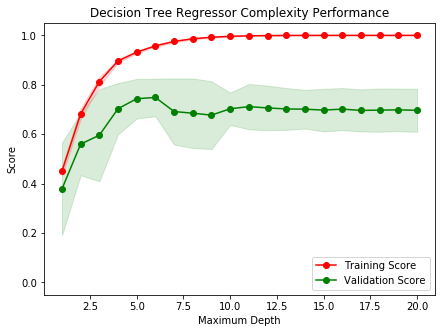

In [29]:
import matplotlib.pyplot as pl
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split

# Create 10 cross-validation sets for training and testing
cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

# Vary the max_depth parameter from 1 to 10
max_depth = np.arange(1,21)

# Calculate the training and testing scores
train_scores, test_scores = curves.validation_curve(regr_DecisionTreeRegressor, X_train, y_train, \
    param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

# Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
pl.figure(figsize=(7, 5))
pl.title('Decision Tree Regressor Complexity Performance')
pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
pl.fill_between(max_depth, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
pl.fill_between(max_depth, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')

# Visual aesthetics
pl.legend(loc = 'lower right')
pl.xlabel('Maximum Depth')
pl.ylabel('Score')
pl.ylim([-0.05,1.05])
pl.show()

The Decision Tree model with the best validation loss has indeed a Max Depth = 6

#### Visualizing the Decision Tree regressor

In [30]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(regr_DecisionTreeRegressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found